In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Height')

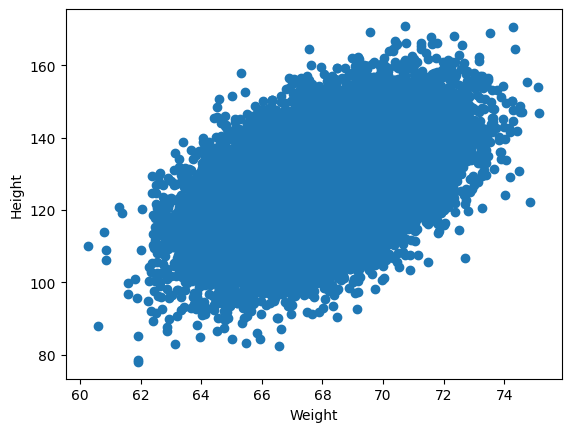

In [9]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df.head()
df.drop("Index",axis=1,inplace=True);
df.head()
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X_series = df[['Weight']]
Y_series = df[['Height']]

,Height
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [153]:
X_trian,X_test,Y_train,Y_test = train_test_split(X_series,Y_series,test_size=0.3,random_state=42)

array([[134.2855],
       [111.9666],
       [135.9871],
       ...,
       [126.4611],
       [134.9922],
       [111.6275]], shape=(7500, 1))

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
X_trian = scaler.fit_transform(X_trian)
X_trian

array([[ 0.29730741],
       [ 0.68868294],
       [-1.04161882],
       ...,
       [-0.52339693],
       [ 0.73791987],
       [-0.36844466]], shape=(17500, 1))

In [156]:
X_test

,Weight
6868,134.2855
24016,111.9666
9668,135.9871
13640,126.3802
14018,100.1810
...,...
21156,125.6399
24654,126.1776
14592,126.4611
20160,134.9922


In [157]:
X_test =scaler.transform(X_test)


In [158]:
X_test

array([[ 0.62084348],
       [-1.29865709],
       [ 0.76718682],
       ...,
       [-0.05208127],
       [ 0.68162206],
       [-1.32782083]], shape=(7500, 1))

In [162]:
Y_train = scaler.fit_transform(Y_train)
Y_train
Y_test = scaler.fit_transform(Y_test)
Y_test

array([[ 0.22912938],
       [-0.04597046],
       [-0.1697039 ],
       ...,
       [-1.49901091],
       [ 1.11767416],
       [-1.47686595]], shape=(7500, 1))

Text(0, 0.5, 'Height')

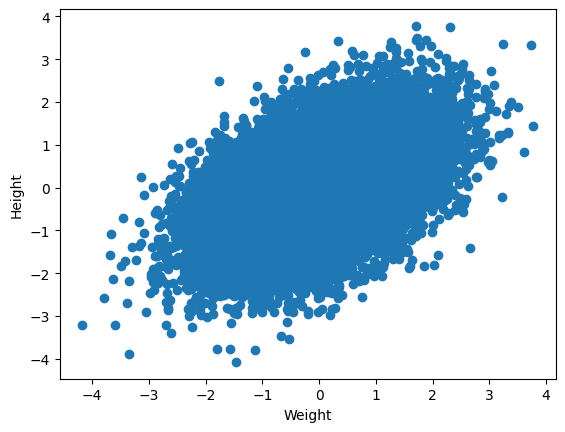

In [163]:
plt.scatter(X_trian,Y_train)
plt.xlabel("Weight")
plt.ylabel("Height")

In [164]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [165]:
regression.fit(X_trian,Y_train)

LinearRegression()

In [166]:
regression.coef_

array([[0.49990302]])

In [167]:
regression.intercept_

array([3.48020273e-16])

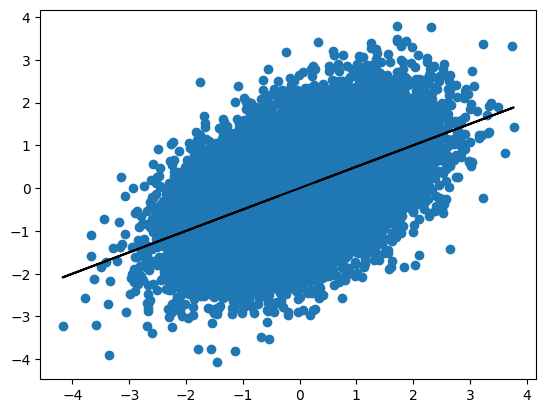

In [177]:
regression.predict(X_test)
plt.scatter(X_trian,Y_train)
plt.plot(X_trian,regression.predict(X_trian),color="black")


In [179]:
y_pred = regression.predict(X_test)
scaler.inverse_transform(y_pred)

array([[68.58033188],
       [66.7391955 ],
       [68.7207007 ],
       ...,
       [67.93487948],
       [68.63862916],
       [66.71122238]], shape=(7500, 1))

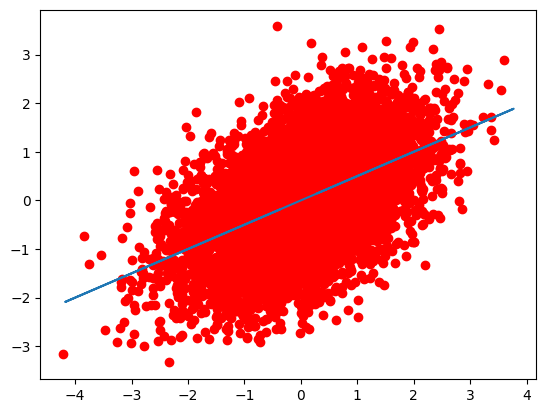

In [181]:
plt.plot(X_trian,regression.predict(X_trian))
plt.scatter(X_test,Y_test,color="red")

In [183]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
print("MSE :-",mse)
print("MAE :-",mae)
print("rmse :-",np.sqrt(mse))

MSE :- 0.7403060205665196
MAE :- 0.6846276391340677
rmse :- 0.8604103791601538


In [184]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
score

0.2596939794334804

In [185]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.25959524563505865

In [187]:
import statsmodels.api as sm
model = sm.OLS(X_trian,Y_train).fit()

In [189]:
model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.250
Model:                            OLS   Adj. R-squared (uncentered):              0.250
Method:                 Least Squares   F-statistic:                              5830.
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                        0.00
Time:                        12:32:07   Log-Likelihood:                         -22315.
No. Observations:               17500   AIC:                                  4.463e+04
Df Residuals:                   17499   BIC:                                  4.464e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------